# K Nearest Neighbours aplicado à base IRIS

Como solicitado na especificação do trabalho, a base de dados foi dividida em três partes: A, B e C - cada uma com a mesma proporção.

Inicialmente, devemos carregar o dataset previamente divido:

In [95]:
import pandas as pd
import seaborn as sns
# Try resetting it 
sns.reset_orig() 

A = pd.read_csv('../Iris/df_A.csv', header=None)
B = pd.read_csv('../Iris/df_B.csv', header=None)
C = pd.read_csv('../Iris/df_C.csv', header=None)

# Set the first row as the header
A.columns = A.iloc[0]
B.columns = B.iloc[0]
C.columns = C.iloc[0]

# Drop the first row now that the headers are set
A = A.drop(A.index[0])
B = B.drop(B.index[0])
C = C.drop(C.index[0])

# Reset the index if needed
A.reset_index(drop=True, inplace=True)
B.reset_index(drop=True, inplace=True)
C.reset_index(drop=True, inplace=True)

Com a base divida de acordo com a especificação, podemos iniciar os experimentos.
A variável abaixo será utilizada posteriormente para compararmos os resultados e tirar uma conclusão baseado nos experimentos.

In [96]:
import pandas as pd

metrics_df = pd.DataFrame(columns=["treinamento", "acuracia", "sensitividade", "especificidade", "precisao"])

## Primeiro: Treinamento (A+B) e Teste (C)

carregar todos os datasets primeiro:

In [97]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score

train = pd.concat([A, B])
test = pd.concat([C])

feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']


x_train = train[feature_columns].values
y_train = train['species'].values

x_test = test[feature_columns].values
y_test = test['species'].values

# Será que é necessário normalizar?
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
specificity_per_class = []
for j in range(len(cm)):
    tn = cm[0, 0] + cm[1, 1] - cm[j, j]
    fp = cm[j, :].sum() - cm[j, j]
    specificity_j = (tn / (tn + fp))
    specificity_per_class.append(specificity_j)

accuracy = accuracy_score(y_test, y_pred)*100
sensitivity = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')



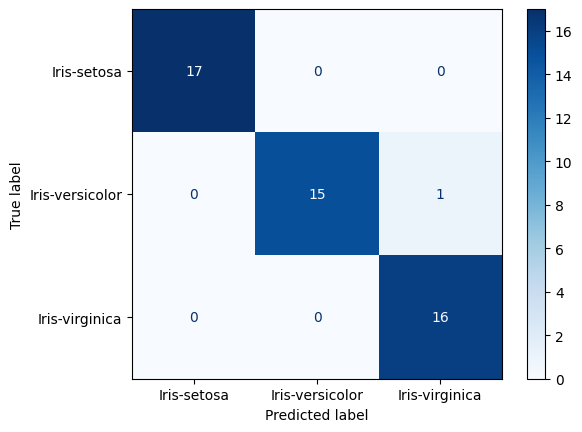

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues) 
plt.show()




In [99]:
metrics_df.loc[0] = {
    "treinamento": "A+B e teste C",
    "acuracia": accuracy,
    "sensitividade": sensitivity,
    "especificidade": specificity_per_class,
    "precisao": precision
}

metrics_df.loc[[0]]

,treinamento,acuracia,sensitividade,especificidade,precisao
0,A+B e teste C,97.959184,0.979167,"[1.0, 0.9444444444444444, 1.0]",0.980392


## Segundo: Treinamento (A+C) e Teste (B)

Os textos explicativos à partir de agora não existirão, porque a sequência  à seguir é basicamente uma repetição anterior, com exceção de um pequeno trecho de código.

In [100]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score

train = pd.concat([A, C])
test = pd.concat([B])

feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']


x_train = train[feature_columns].values
y_train = train['species'].values

x_test = test[feature_columns].values
y_test = test['species'].values

# Será que é necessário normalizar?
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
specificity_per_class = []
for j in range(len(cm)):
    tn = cm[0, 0] + cm[1, 1] - cm[j, j]
    fp = cm[j, :].sum() - cm[j, j]
    specificity_j = (tn / (tn + fp))
    specificity_per_class.append(specificity_j)

accuracy = accuracy_score(y_test, y_pred)*100
sensitivity = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


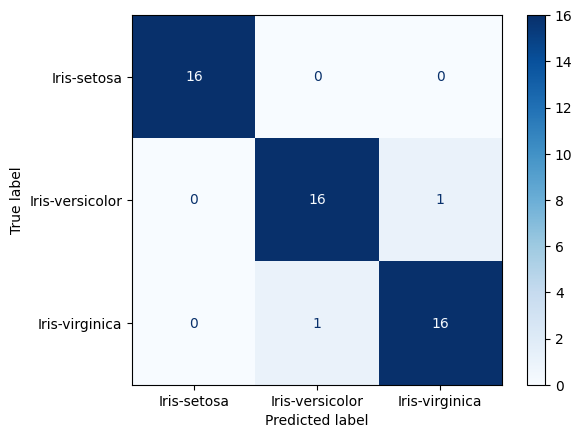

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues) 
plt.show()




In [102]:

metrics_df.loc[1] = {
    "treinamento": "A+C e teste B",
    "acuracia": accuracy,
    "sensitividade": sensitivity,
    "especificidade": specificity_per_class,
    "precisao": precision
}

metrics_df.loc[[1]]


,treinamento,acuracia,sensitividade,especificidade,precisao
1,A+C e teste B,96.0,0.960784,"[1.0, 0.9411764705882353, 0.9411764705882353]",0.960784


## Terceiro: Treinamento (C+B) e Teste (A)


In [103]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score

train = pd.concat([B, C])
test = pd.concat([A])

feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']


x_train = train[feature_columns].values
y_train = train['species'].values

x_test = test[feature_columns].values
y_test = test['species'].values

# Será que é necessário normalizar?
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
specificity_per_class = []
for j in range(len(cm)):
    tn = cm[0, 0] + cm[1, 1] - cm[j, j]
    fp = cm[j, :].sum() - cm[j, j]
    specificity_j = (tn / (tn + fp))
    specificity_per_class.append(specificity_j)

accuracy = accuracy_score(y_test, y_pred)*100
sensitivity = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')



,treinamento,acuracia,sensitividade,especificidade,precisao
2,B+C e teste A,96.078431,0.960784,"[1.0, 0.9444444444444444, 0.9444444444444444]",0.960784


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues) 
plt.show()




In [ ]:
metrics_df.loc[2] = {
    "treinamento": "B+C e teste A",
    "acuracia": accuracy,
    "sensitividade": sensitivity,
    "especificidade": specificity_per_class,
    "precisao": precision
}

metrics_df.loc[[2]]

## Resultados

In [104]:
metrics_df

,treinamento,acuracia,sensitividade,especificidade,precisao
0,A+B e teste C,97.959184,0.979167,"[1.0, 0.9444444444444444, 1.0]",0.980392
1,A+C e teste B,96.000000,0.960784,"[1.0, 0.9411764705882353, 0.9411764705882353]",0.960784
2,B+C e teste A,96.078431,0.960784,"[1.0, 0.9444444444444444, 0.9444444444444444]",0.960784


DÚVIDA: será que é bom mostrar o código abaixo?

<Figure size 640x480 with 0 Axes>

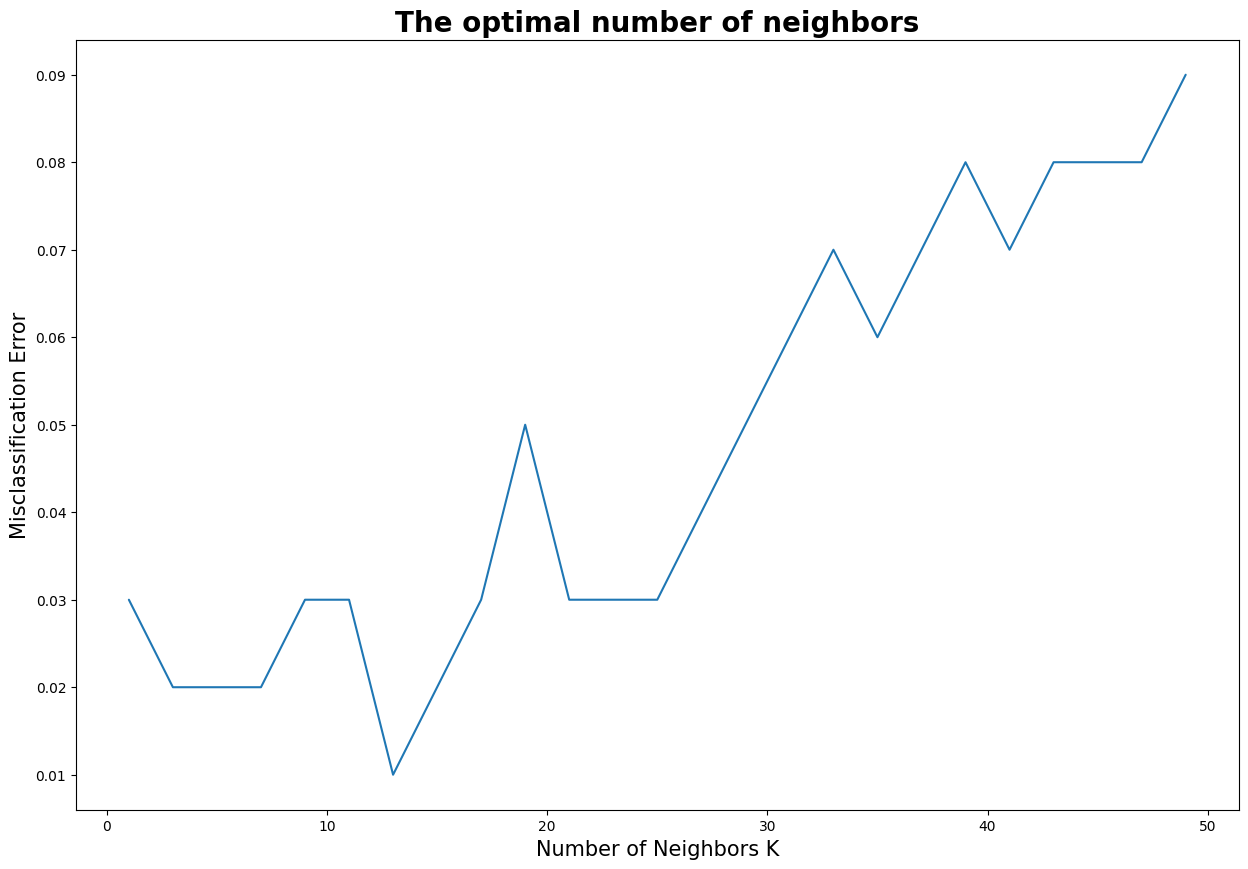

The optimal number of neighbors is 13.


In [105]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()


best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

